In [1]:
import tensorflow as tf
x = tf.Variable(3)
y = tf.Variable(4)
f = x*x*y + y + 2

In [3]:
sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

42


In [5]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()
    print(result)

42


In [9]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result = f.eval()
    print(result)

42


In [11]:
x1 = tf.Variable(1)
x1.graph is tf.get_default_graph()

True

In [23]:
graph = tf.Graph()
with graph.as_default():
    x2 = tf.Variable(2)
x2.graph is tf.get_default_graph()
graph1 = tf.Graph()
with graph1.as_default():
    x3 = tf.Variable(3)
x3.graph is graph1

True

In [29]:
import numpy as np
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype = tf.float32, name = "X")
y = tf.constant(housing.target.reshape(-1, 1), dtype = tf.float32, name = 'y')
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()
    print (theta_value)

[[ -3.74651413e+01]
 [  4.35734153e-01]
 [  9.33829229e-03]
 [ -1.06622010e-01]
 [  6.44106984e-01]
 [ -4.25131839e-06]
 [ -3.77322501e-03]
 [ -4.26648885e-01]
 [ -4.40514028e-01]]


In [45]:
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
X_scaled = stdscaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), X_scaled]

In [58]:
n_epochs = 10000
m_epochs = 10000
learning_rate_1 = 0.1
learning_rate_2 = 0.01

X = tf.constant(scaled_housing_data_plus_bias, dtype = tf.float32)
y = tf.constant(housing.target.reshape(-1, 1), dtype = tf.float32)
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0))
y_pred = tf.matmul(X, theta)
error = y_pred - y
mse = tf.reduce_mean(tf.square(error))
gradients = 2 / m * tf.matmul(tf.transpose(X), error)
training_op_1 = tf.assign(theta, theta - learning_rate_1 * gradients)
training_op_2 = tf.assign(theta, theta - learning_rate_2 * gradients)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(m_epochs):
        if epoch % 100 == 0:
            print ("Epoch", epoch, "MSE =", mse.eval())
            sess.run(training_op_1)
    
    for epoch in range(n_epochs):
        if epoch % 100 == 0:
            print ("Epoch", epoch + m_epochs, "MSE =", mse.eval())
            sess.run(training_op_2)
            
    best_theta = theta.eval()
    
    print(best_theta)

Epoch 0 MSE = 8.76573
Epoch 100 MSE = 5.43739
Epoch 200 MSE = 3.57033
Epoch 300 MSE = 2.46622
Epoch 400 MSE = 1.78961
Epoch 500 MSE = 1.36535
Epoch 600 MSE = 1.09532
Epoch 700 MSE = 0.921663
Epoch 800 MSE = 0.809072
Epoch 900 MSE = 0.735513
Epoch 1000 MSE = 0.687057
Epoch 1100 MSE = 0.654821
Epoch 1200 MSE = 0.633112
Epoch 1300 MSE = 0.618258
Epoch 1400 MSE = 0.607895
Epoch 1500 MSE = 0.600485
Epoch 1600 MSE = 0.595029
Epoch 1700 MSE = 0.590879
Epoch 1800 MSE = 0.587606
Epoch 1900 MSE = 0.584932
Epoch 2000 MSE = 0.582671
Epoch 2100 MSE = 0.580701
Epoch 2200 MSE = 0.578938
Epoch 2300 MSE = 0.577329
Epoch 2400 MSE = 0.575836
Epoch 2500 MSE = 0.574433
Epoch 2600 MSE = 0.573102
Epoch 2700 MSE = 0.571831
Epoch 2800 MSE = 0.570611
Epoch 2900 MSE = 0.569437
Epoch 3000 MSE = 0.568302
Epoch 3100 MSE = 0.567203
Epoch 3200 MSE = 0.566139
Epoch 3300 MSE = 0.565105
Epoch 3400 MSE = 0.564102
Epoch 3500 MSE = 0.563127
Epoch 3600 MSE = 0.562178
Epoch 3700 MSE = 0.561257
Epoch 3800 MSE = 0.560359
Epoch

In [67]:
n_epochs = 1000
learning_rate = 0.01
X = tf.placeholder(tf.float32, shape = (None, n+1))
y = tf.placeholder(tf.float32, shape = (None, 1))

batch_size = 100
n_batches = int(np.ceil(m / batch_size))

def fetch_batch(epoch, batch_index, batch_size):
    np.random.seed(epoch * n_batches + batch_index)
    indices = np.random.randint(m, size=batch_size)
    X_batch = scaled_housing_data_plus_bias[indices]
    y_batch = housing.target.reshape(-1, 1)[indices]
    return X_batch, y_batch

mse = tf.reduce_mean(tf.square(error), name = 'mse')
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(mse)

init = tf.global_variables_initializer()

In [68]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y:y_batch})
        if epoch % 10 == 0:
            print("For epoch: ", epoch, ", mse: ", mse.eval())
    best_theta = theta.eval()

For epoch:  0 , mse:  0.657362
For epoch:  10 , mse:  0.525167
For epoch:  20 , mse:  0.524337
For epoch:  30 , mse:  0.524321
For epoch:  40 , mse:  0.524321
For epoch:  50 , mse:  0.524321
For epoch:  60 , mse:  0.524321
For epoch:  70 , mse:  0.524321
For epoch:  80 , mse:  0.524321
For epoch:  90 , mse:  0.524321
For epoch:  100 , mse:  0.524321
For epoch:  110 , mse:  0.524321
For epoch:  120 , mse:  0.524321
For epoch:  130 , mse:  0.524321


KeyboardInterrupt: 

In [72]:
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

tf.reset_default_graph()
X = tf.placeholder(tf.float32, shape=(None, n + 1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse)
init = tf.global_variables_initializer()
n_epochs = 10
batch_size = 100
n_batches = int(np.ceil(m / batch_size))

with tf.name_scope("loss") as scope:
    error = y_pred - y
    mse = tf.reduce_mean(tf.square(error), name = 'mse')
    
mse_summary = tf.summary.scalar("MSE", mse)
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(epoch, batch_index, batch_size)
            if batch_index % 10 == 0:
                summary_str = mse_summary.eval(feed_dict = {X:X_batch, y:y_batch})
                step = epoch * n_batches + batch_index
                file_writer.add_summary(summary_str, step)    
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        print ("Epoch ", epoch, "done")
        
    best_theta = theta.eval()
    
file_writer.close()

Epoch  0 done
Epoch  1 done
Epoch  2 done
Epoch  3 done
Epoch  4 done
Epoch  5 done
Epoch  6 done
Epoch  7 done
Epoch  8 done
Epoch  9 done


In [74]:
tf.reset_default_graph()
from datetime import datetime

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)

def relu(X):
    with tf.name_scope("relu"):
        w_shape = (int(X.get_shape()[1]), 1)
        w = tf.Variable(tf.random_normal(w_shape), name = 'weights')
        b = tf.Variable(0.0, name = 'bias')
        z = tf.add(tf.matmul(X, w), b, name = 'z')
        return tf.maximum(z, 0., name = 'relu')

n_features = 3
X = tf.placeholder(tf.float32, shape = (None, n_features), name = 'X')
relus = [relu(X) for i in range(5)]
output = tf.add_n(relus, name = 'output')
file_writer = tf.summary.FileWriter("logs/relu1", tf.get_default_graph())
file_writer.close()

In [5]:
from sklearn.datasets import make_moons

m = 1000
X_moons, y_moons = make_moons(m, noise = 0.1, random_state=42)

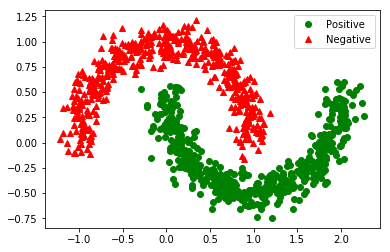

In [6]:
import matplotlib.pyplot as plt
plt.plot(X_moons[y_moons == 1, 0], X_moons[y_moons == 1, 1], 'go', label = 'Positive')
plt.plot(X_moons[y_moons == 0, 0], X_moons[y_moons == 0, 1], 'r^', label = 'Negative')
plt.legend()
plt.show()

In [11]:
import numpy as np
import tensorflow as tf

X_moons_with_bias = np.c_[np.ones((m, 1)), X_moons]
y_moons_column = y_moons.reshape(-1, 1)
test_ratio = 0.2
test_size = int(m * test_ratio)
X_train = X_moons_with_bias[: -test_size]
X_test = X_moons_with_bias[-test_size:]
y_train = y_moons_column[:-test_size]
y_test = y_moons_column[-test_size:]

In [10]:
def random_batch(X_train, y_train, batch_size):
    rnd_indices = np.random.randint(0, len(X_train), batch_size)
    X_batch = X_train[rnd_indices]
    y_batch = y_train[rnd_indices]
    return X_batch, y_batch

In [14]:
n_inputs = 2
X = tf.placeholder(tf.float32, shape = (None, n_inputs + 1), name = 'X')
y = tf.placeholder(tf.float32, shape = (None, 1), name = 'y')
theta = tf.Variable(tf.random_uniform([n_inputs + 1, 1], -1.0, 1.0, seed = 42), name = 'theta')
logits = tf.matmul(X, theta, name = 'logits')
y_proba = tf.sigmoid(logits)
loss = tf.losses.log_loss(y, y_proba)

learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [29]:
import os

n_epochs = 1000
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

def logistic_regression(X, y, initializer = None, seed = 42, learning_rate = 0.01):
    n_inputs_including_bias = int(X.get_shape()[1])
    with tf.name_scope('logistic_regression'):
        with tf.name_scope('model'):
            if initializer is None:
                initializer = tf.random_uniform([n_inputs_including_bias, 1], -1.0, 1.0, seed = seed)
            theta = tf.Variable(initializer, name = 'theta')
            logits = tf.matmul(X, theta, name = 'logits')
            y_proba = tf.sigmoid(logits)
        with tf.name_scope('train'):
            loss = tf.losses.log_loss(y, y_proba, scope = 'loss')
            optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
            training_op = optimizer.minimize(loss)
            loss_summary = tf.summary.scalar('log_loss', loss)
        with tf.name_scope('init'):
            init = tf.global_variables_initializer()
        with tf.name_scope('save'):
            saver = tf.train.Saver()
        return y_proba, loss, training_op, loss_summary, init, saver

In [30]:
from datetime import datetime

def log_dir(prefix = ""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = 'tf_logs'
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

n_inputs = 2 + 4
logdir = log_dir('logreg')

y_proba, loss, training_op, loss_summary, init, saver = logistic_regression(X, y)

file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

In [34]:
n_epochs = 3501
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = '/tmp/my_logreg_model.ckpt'
checkpoint_epoch_path = checkpoint_path + '.epoch'
final_model_path = './my_logreg_model'

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        with open(checkpoint_epoch_path, 'rb') as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuining at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)
    
    for epoch in range(start_epoch, n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = random_batch(X_train, y_train, batch_size)
            sess.run(training_op, feed_dict = {X: X_batch, y: y_batch})
        loss_val, summary_str = sess.run([loss, loss_summary], feed_dict = {X:X_test, y:y_test})
        file_writer.add_summary(summary_str, epoch)
        if epoch % 500 == 0:
            print("Epoch:", epoch, "\tLoss:", loss_val)
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, 'wb') as f:
                f.write(b"%d" % (epoch + 1))
            
        saver.save(sess, final_model_path)
        y_proba_val = y_proba.eval(feed_dict = {X:X_test, y:y_test})
       

Training was interrupted. Continuining at epoch 10001
INFO:tensorflow:Restoring parameters from /tmp/my_logreg_model.ckpt
